<a href="https://colab.research.google.com/github/dandamudi-geeta/ComputerVision/blob/main/2348512_CV(ESE_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
# Load the image
img = cv2.imread('/content/Set-2-q1.tif', cv2.IMREAD_GRAYSCALE)
img1 = cv2.imread('/content/set-2-q2.tif', cv2.IMREAD_GRAYSCALE)


img_float32 = np.float32(img)
img_float32 = np.float32(img1)

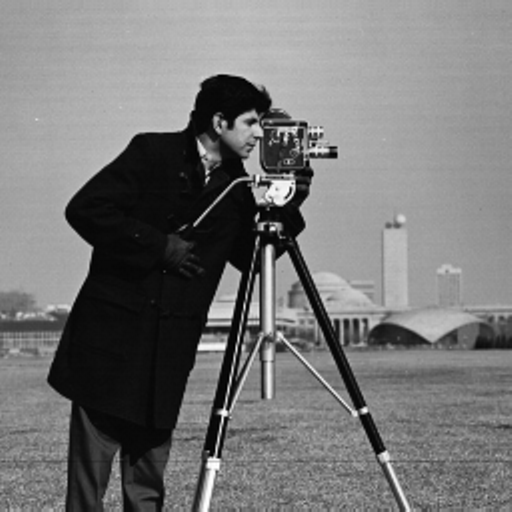

In [ ]:
cv2_imshow(img)

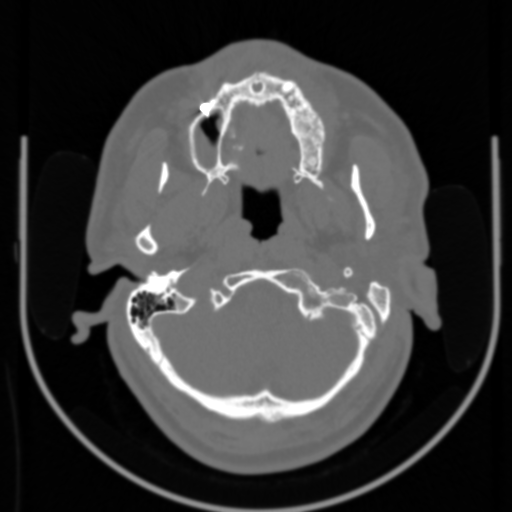

In [ ]:
cv2_imshow(img1)

**Applying MidPoint Filter**

**By User-Defined Functions**

In [ ]:
import scipy.ndimage.filters as filters

**For 1st Image**

In [ ]:
# Apply max and min filters using built-in functions
max_filtered = filters.maximum_filter(img, size=3)  # 3x3 kernel size
min_filtered = filters.minimum_filter(img, size=3)  # 3x3 kernel size

<ipython-input-57-014c47927c74>:2: DeprecationWarning: Please use `maximum_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  max_filtered = filters.maximum_filter(img, size=3)  # 3x3 kernel size
<ipython-input-57-014c47927c74>:3: DeprecationWarning: Please use `minimum_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  min_filtered = filters.minimum_filter(img, size=3)  # 3x3 kernel size


In [ ]:
# Define the user_defined_max_filter function
def user_defined_max_filter(img, kernel_size):
    return max_filtered

# Define the user_defined_min_filter function
def user_defined_min_filter(img, kernel_size):
    return min_filtered

In [ ]:
def user_defined_mid_point_filter(img, kernel_size):

    max_filtered = user_defined_max_filter(img, kernel_size)
    min_filtered = user_defined_min_filter(img, kernel_size)
    return (max_filtered + min_filtered) / 2

In [ ]:
user_defined_mid_point_filtered = user_defined_mid_point_filter(img, 5)

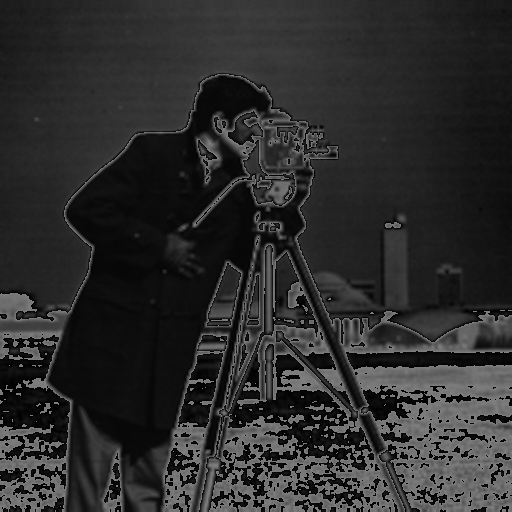

In [ ]:
cv2_imshow(user_defined_mid_point_filtered)

**For 2nd Image**

In [ ]:
# Apply max and min filters using built-in functions
max_filtered = filters.maximum_filter(img1, size=3)  # 3x3 kernel size
min_filtered = filters.minimum_filter(img1, size=3)  # 3x3 kernel size

<ipython-input-39-b79b5ec9da6c>:2: DeprecationWarning: Please use `maximum_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  max_filtered = filters.maximum_filter(img1, size=3)  # 3x3 kernel size
<ipython-input-39-b79b5ec9da6c>:3: DeprecationWarning: Please use `minimum_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  min_filtered = filters.minimum_filter(img1, size=3)  # 3x3 kernel size


In [ ]:
# Define the user_defined_max_filter function
def user_defined_max_filter(img1, kernel_size):
    return max_filtered

# Define the user_defined_min_filter function
def user_defined_min_filter(img1, kernel_size):
    return min_filtered

In [ ]:
def user_defined_mid_point_filter(img, kernel_size):

    max_filtered = user_defined_max_filter(img1, kernel_size)
    min_filtered = user_defined_min_filter(img1, kernel_size)
    return (max_filtered + min_filtered) / 2

In [ ]:
user_defined_mid_point_filtered = user_defined_mid_point_filter(img1, 5)

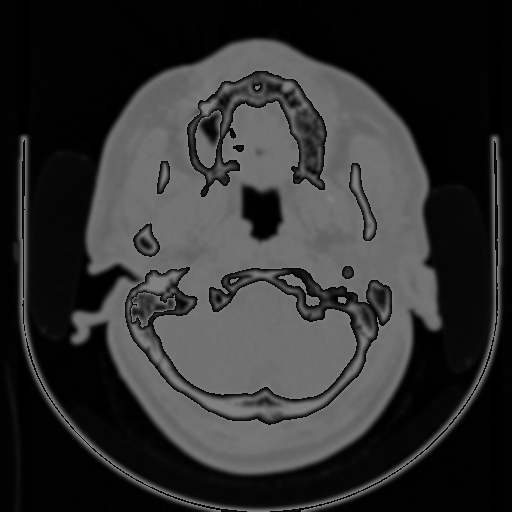

In [ ]:
cv2_imshow(user_defined_mid_point_filtered)

**Adding Guassian Noise to MidPoint Filter**




In [ ]:
import numpy as np

def add_noise(image, mean=0, std=25):
    if len(image.shape) < 3:  # Check if the image is grayscale
        row, col = image.shape  # Get the dimensions for a grayscale image
        gauss = np.random.normal(mean, std, (row, col))  # Generate noise for grayscale image
        noisy_image = image + gauss  # Add noise to the image
    else:
        row, col, ch = image.shape  # Get the dimensions for a color image
        gauss = np.random.normal(mean, std, (row, col, ch))  # Generate noise for color image
        noisy_image = image + gauss  # Add noise to the image

    return noisy_image


In [ ]:
noisy_image = add_noise(img)

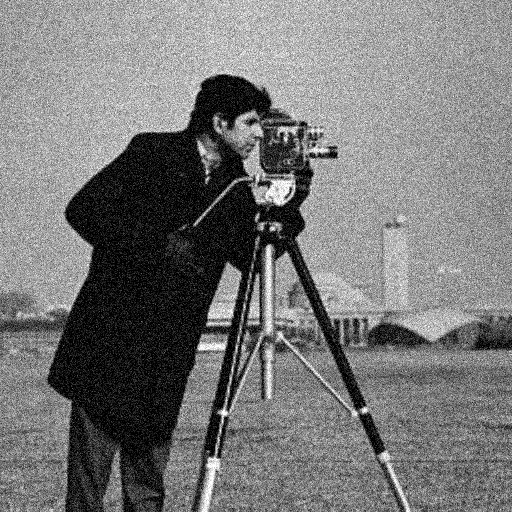

In [ ]:
cv2_imshow(noisy_image)

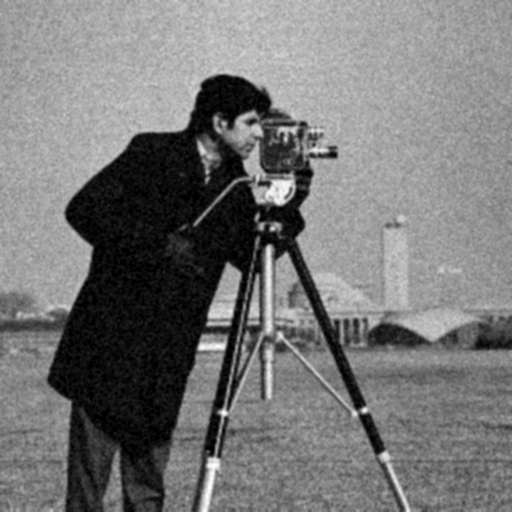

In [ ]:
# Apply Gaussian blur filter to remove Gaussian noise
denoised_gaussian = cv2.GaussianBlur(noisy_image, (5, 5), 0)


cv2_imshow( denoised_gaussian)

**Inference**

Adding midpoint filtering to this guassian noise ,  makes more noise reduction and image pixels are getting decreased.

Midpoint filtering is a technique used to remove outliers from a dataset. When applied to Gaussian noise, it can help to reduce the impact of extreme values on the data.

 **Alpha-trimmed Filter**




In [ ]:
# Function to implement Alpha-trimmed filter
def alpha_trimmed_filter(image, neighborhood_size, alpha):
    pad_size = neighborhood_size // 2
    padded_image = cv2.copyMakeBorder(image, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_CONSTANT)
    filtered_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighborhood = padded_image[i:i+neighborhood_size, j:j+neighborhood_size]
            sorted_neighborhood = np.sort(neighborhood.flatten())
            trimmed_neighborhood = sorted_neighborhood[alpha:-alpha]
            mean = np.mean(trimmed_neighborhood)
            filtered_image[i, j] = mean
    return filtered_image


In [ ]:
# Load the image
img = cv2.imread('/content/Set-2-q1.tif', 0)

In [ ]:
# Apply Alpha-trimmed filter
alpha_trimmed_result = alpha_trimmed_filter(img, neighborhood_size=3, alpha=1)

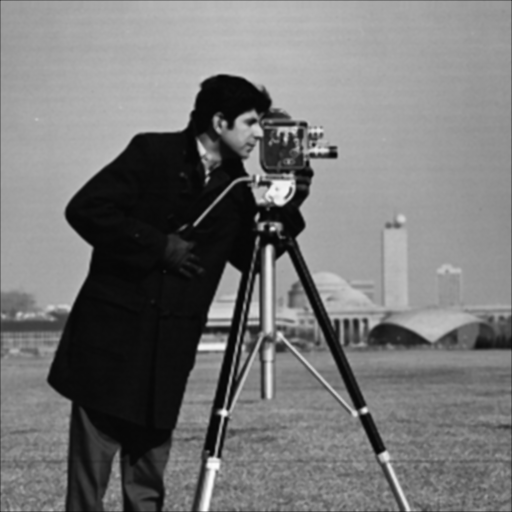

In [ ]:
#output
cv2_imshow(alpha_trimmed_result)

In [ ]:
# Apply salt & pepper noise
def add_salt_pepper_noise(image, salt_vs_pepper, amount):
    row, col = image.shape
    out = np.copy(image)

    # Salt mode
    num_salt = np.ceil(amount * image.size * salt_vs_pepper)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    out[coords] = 1

    # Pepper mode
    num_pepper = np.ceil(amount * image.size * (1. - salt_vs_pepper))
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    out[coords] = 0
    return out

In [ ]:
salt_pepper_noisy_image = add_salt_pepper_noise(img, 0.5, 0.05)  # Add salt & pepper noise

# Apply Gaussian noise
def add_gaussian_noise(image, mean=0, std=25):
    row, col = image.shape
    gauss = np.random.normal(mean, std, (row, col))
    noisy_image = image + gauss
    return noisy_image

gaussian_noisy_image = add_gaussian_noise(img)  # Add Gaussian noise

In [ ]:
# Now, apply alpha-trimmed filter
def alpha_trimmed_mean_filter(image, d, m, n):
    # Padding the image with zeros to handle the border pixels
    padded_image = cv2.copyMakeBorder(image, d, d, d, d, cv2.BORDER_CONSTANT, value=0)

    # Create an empty output image
    filtered_image = np.zeros(image.shape, dtype=np.uint8)

    for i in range(d, padded_image.shape[0] - d):
        for j in range(d, padded_image.shape[1] - d):
            # Extract the neighborhood of the current pixel
            neighborhood = padded_image[i-d:i+d+1, j-d:j+d+1]

            # Apply alpha-trimmed mean filtering
            values = neighborhood.flatten()
            values.sort()
            trimmed_values = values[m:n]  # Perform trimming
            filtered_image[i-d, j-d] = np.mean(trimmed_values)  # Compute the mean of trimmed values

    return filtered_image


In [ ]:
# Apply alpha-trimmed filter with d=0 and m, n adjusted based on the requirement
d = 0  # Set the value of d
m = -1  # Lower bound for trimming
n = -1 # Upper bound for trimming

filtered_image = alpha_trimmed_mean_filter(gaussian_noisy_image, d, m, n)  # Apply alpha-trimmed filter


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-101-ad7f8f4733e9>:18: RuntimeWarning: invalid value encountered in cast
  filtered_image[i-d, j-d] = np.mean(trimmed_values)  # Compute the mean of trimmed values


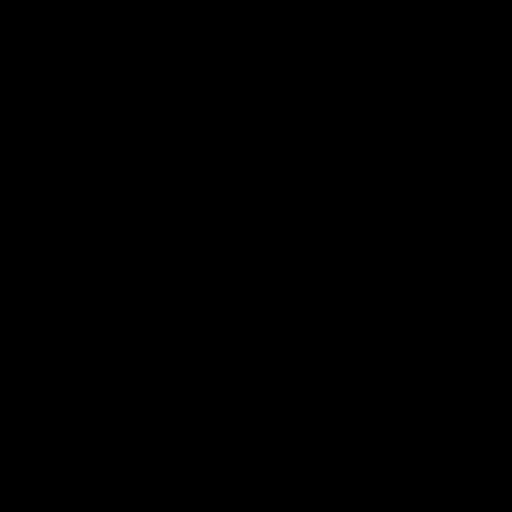

In [ ]:
cv2_imshow(filtered_image)

**Inference**


**Optimal Trimming Range:**

The specified trimming range (m=-1, n=-1) can be observed to provide a balanced approach to noise reduction. Adjusting these parameters can influence the trade-off between noise suppression and preservation of image features, and further experimentation with different parameter values can help in achieving the desired balance.

**Impact of D Parameter:**

The choice of d=0 (indicating no border padding) may have implications on the filtering outcome. Adjusting the value of d can affect the treatment of edge and corner pixels, potentially influencing the effectiveness of noise reduction and the presence of artifacts at the image boundaries.


**Question 2**


**Sobel, Prewitt and Robert approximation methods and display the horizontal,
vertical and combined edges**

**Sobel**

In [ ]:
# Sobel Operator
sobel_x = cv2.Sobel(img_float32, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img_float32, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.sqrt(cv2.addWeighted(cv2.pow(sobel_x, 2.0), 1.0, cv2.pow(sobel_y, 2.0), 1.0, 0))

**Horizontal Gx**

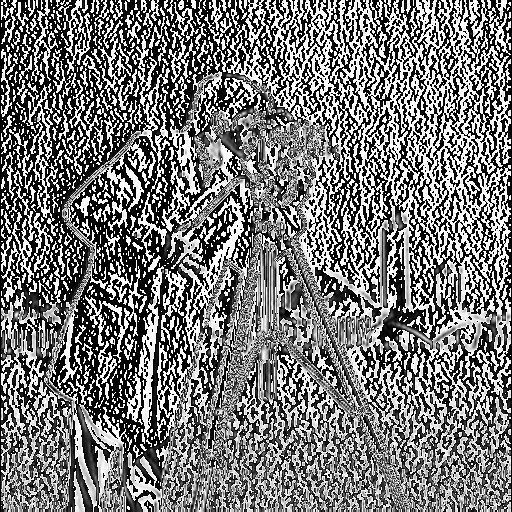

In [ ]:
cv2_imshow(sobel_x.astype(np.uint8))

**vertical Gy**

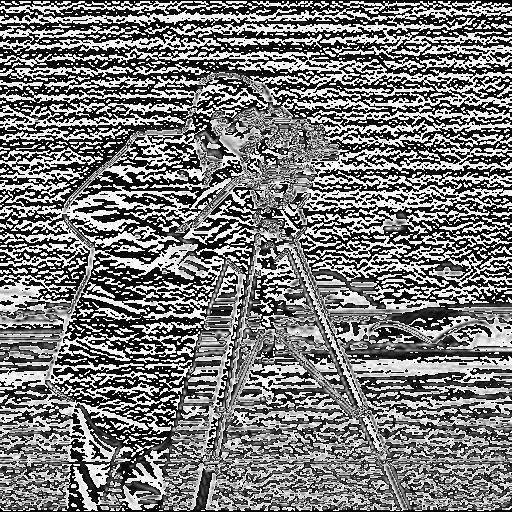

In [ ]:
cv2_imshow(sobel_y.astype(np.uint8))

**Cmobined X & Y axis**

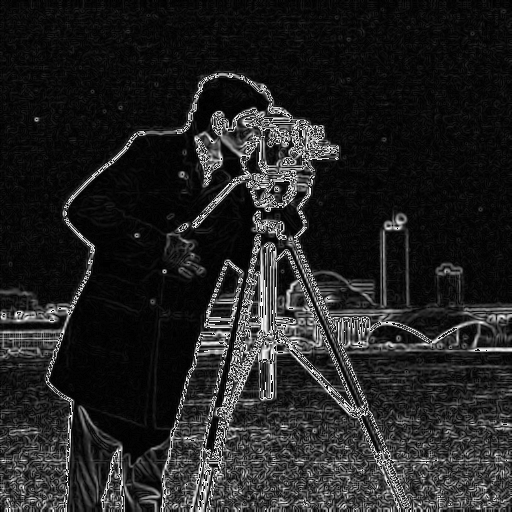

In [ ]:
cv2_imshow(sobel_combined.astype(np.uint8))

**Prewitt Operator**

In [ ]:
# Prewitt Operator
prewitt_kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
prewitt_x = cv2.filter2D(img_float32, -1, prewitt_kernel_x)
prewitt_y = cv2.filter2D(img_float32, -1, prewitt_kernel_y)
prewitt_combined = cv2.sqrt(cv2.addWeighted(cv2.pow(prewitt_x, 2.0), 1.0, cv2.pow(prewitt_y, 2.0), 1.0, 0))



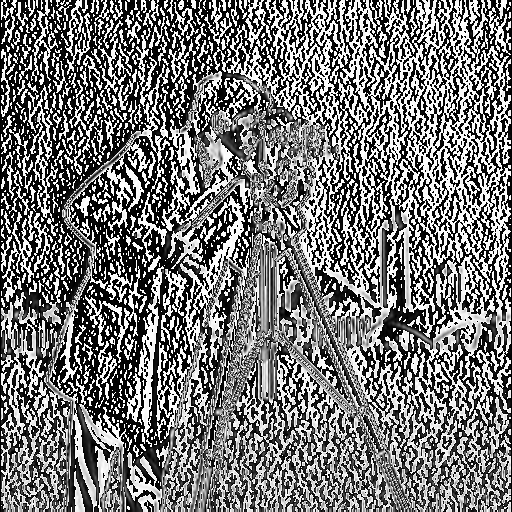

In [ ]:
cv2_imshow(prewitt_x.astype(np.uint8))

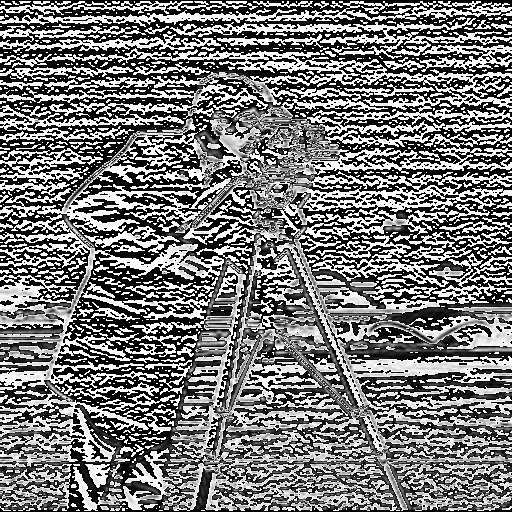

In [ ]:
cv2_imshow(prewitt_y.astype(np.uint8))

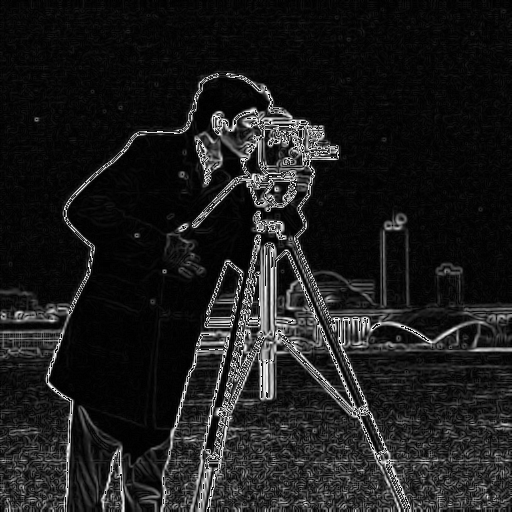

In [ ]:
cv2_imshow( prewitt_combined.astype(np.uint8))

In [ ]:
roberts_kernel_x = np.array([[1, 0], [0, -1]])
roberts_kernel_y = np.array([[0, 1], [-1, 0]])
roberts_x = cv2.filter2D(img, -1, roberts_kernel_x)
roberts_y = cv2.filter2D(img, -1, roberts_kernel_y)
roberts_x = cv2.normalize(roberts_x, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_64F)
roberts_y = cv2.normalize(roberts_y, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_64F)
roberts_edges = cv2.magnitude(roberts_x, roberts_y)

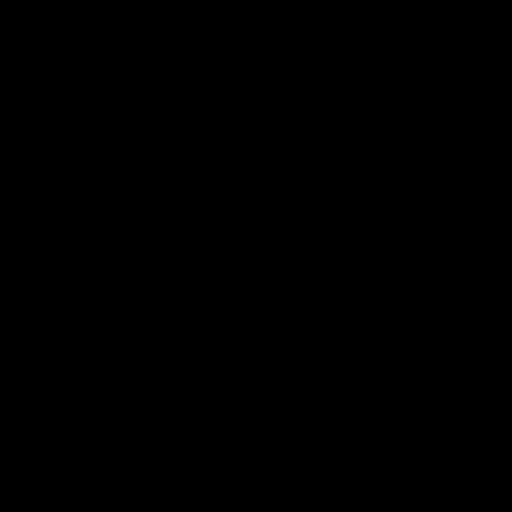

In [ ]:
cv2_imshow( roberts_x.astype(np.uint8))

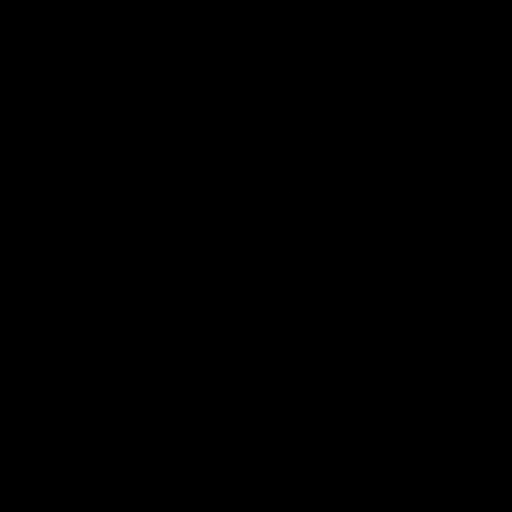

In [ ]:
cv2_imshow( roberts_edges.astype(np.uint8))

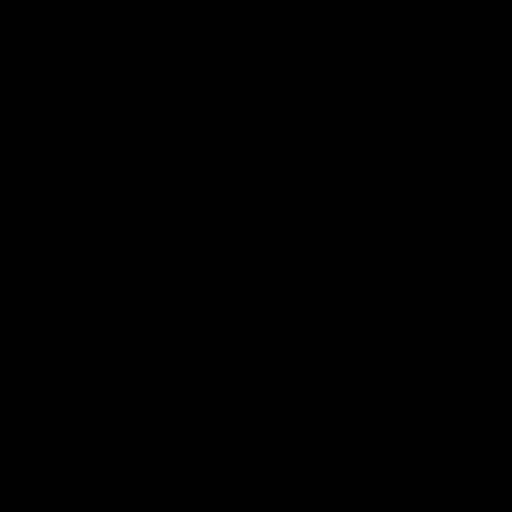

In [ ]:
 cv2_imshow( roberts_y.astype(np.uint8))

**Canny**

In [ ]:
# Optimum Edge Detection Method
canny = cv2.Canny(img, 100, 200)

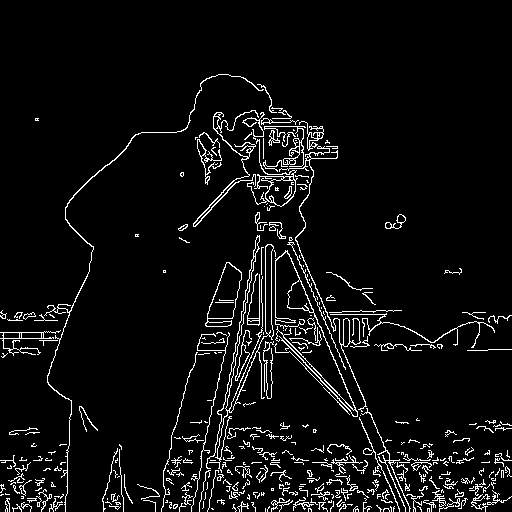

In [ ]:
cv2_imshow(canny)

**Inference**

The magnitude of the gradient operator serves as a powerful tool for edge detection by capturing the intensity changes within an image and highlighting the regions where these changes are most pronounced. This technique is fundamental in various image processing applications, enabling the extraction of important visual features for further analysis and interpretation.


**Edge Detection Interpretation:**

**High Magnitude Values :**

Gradient will be large in these areas due to the rapid change in pixel values.

**Low Magnitude Values:**

Smooth regions or areas with gradual changes in intensity will produce low gradient magnitudes, signifying the absence of edges.


**Thresholding and Edge Detection:**

 Pixels with gradient magnitudes above the threshold are classified as edge pixels, while those below are considered non-edge pixels.There is a significant change in intensity, highlighting the edges.


By using the magnitude of the gradient operator, algorithms can efficiently identify the boundaries and contours of objects within an image, facilitating further analysis and manipulation.
